<a href="https://colab.research.google.com/github/noahhai/2goarray/blob/master/real_estate/pittsburgh_rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!curl -o national_vacancy.csv https://raw.githubusercontent.com/noahhai/data/master/data/rental_vacancy_rate_us.csv
!curl -o housing_inventory.csv https://raw.githubusercontent.com/noahhai/data/master/data/housing_inventory_estimate.csv
!curl -o us_population.csv https://raw.githubusercontent.com/noahhai/data/master/data/us_population.csv
!curl -o us_employment.csv https://raw.githubusercontent.com/noahhai/data/master/data/us_employment_25_54.csv
!curl -o pittsburgh_crime_historic.csv https://raw.githubusercontent.com/noahhai/data/master/data/pittsburgh_crime_2005_2015.csv
!pip install adjusttext

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3904  100  3904    0     0   7902      0 --:--:-- --:--:-- --:--:--  7886
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1477  100  1477    0     0   3319      0 --:--:-- --:--:-- --:--:--  3326
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5499  100  5499    0     0  12729      0 --:--:-- --:--:-- --:--:-- 12699
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4901  100  4901    0     0  10939      0 --:--:-- --:--:-- --:--:-- 10964
  % Total    % Received % Xferd  Average Speed   Tim

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
crime = pd.read_csv('pittsburgh_crime_historic.csv')
crime

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,HIERARCHYDESC,OFFENSES,INCIDENTTRACT,X,Y
0,2075487,5000381,6,1/1/2005 8:00,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",N,Squirrel Hill North,4,MOTOR THEFT (OTHER)-PLATE ONLY,3921 Theft by Unlawful Taking or Disposition.,1401.0,-79.934027,40.438870
1,2075783,5001279,7,1/3/2005 2:00,"PARKVIEW PITTSBURGH, PA",N,Squirrel Hill North,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,407.0,0.000000,0.000000
2,2075786,5001488,7,1/3/2005 17:00,"CROSBY AND PAULINE & PITTSBURGH, PA",N,Squirrel Hill North,3,MOTOR VEH THEFT/TRUCK-BUS,3921 Theft by Unlawful Taking or Disposition.,1907.0,0.000000,0.000000
3,2076278,5002628,7,1/5/2005 19:30,"1100 Block COLFAX ST PITTSBURGH, PA",N,Squirrel Hill North,1,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,2102.0,-80.024329,40.462542
4,2076279,5002647,7,1/5/2005 20:20,"ALDER/SHADY & PITTSBURGH, PA",N,Shadyside,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,705.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495246,2777650,15179836,10,9/20/2015 18:33,"1400 Block Brookline BL Pittsburgh, PA 15226",Y,Brookline,6,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",3206.0,-80.007850,40.392365
495247,2779439,15184891,6,9/27/2015 8:30,"3200 Block Dawson ST Pittsburgh, PA 15213",N,South Oakland,4,THEFT FROM AUTO,9489 Found Property,409.0,-79.953984,40.429913
495248,2774627,15165557,14,9/1/2015 11:55,"400 Block Tripoli ST Pittsburgh, PA 15212",Y,East Allegheny,1,CRIMINAL MISCHIEF,3304 Criminal Mischief.,2304.0,-80.002454,40.455747
495249,2774959,15167713,99,9/4/2015 6:45,"Shady AV & Walnut ST Pittsburgh, PA 15206",N,Shadyside,4,NaN,3745 Accidents Involving Damage to Unattended ...,706.0,-79.922546,40.455862


In [17]:

us_employment = pd.read_csv('us_employment.csv')
us_employment = us_employment.rename(columns={'LREM25TTUSQ156S': 'employment_rate'})
us_employment['employment_rate'] = us_employment['employment_rate']/100
us_employment['unemployment_rate'] = 1 - us_employment['employment_rate']

national_vacancy = pd.read_csv('national_vacancy.csv')
national_vacancy = national_vacancy.rename(columns={'RRVRUSQ156N': 'vacancy_rate'}).merge(us_employment, how='inner', on='DATE')


us_population = pd.read_csv('us_population.csv')
us_population = us_population.rename(columns={'B230RC0Q173SBEA': 'us_population'})
us_population['us_population_prev'] = us_population['us_population'].shift(1) 
us_population['us_population_change'] = us_population['us_population'] - us_population['us_population_prev']
# us_population


housing_inventory = pd.read_csv('housing_inventory.csv')
housing_inventory = housing_inventory.rename(columns={'ETOTALUSQ176N': 'housing_inventory'})
housing_inventory['housing_inventory_prev'] = housing_inventory['housing_inventory'].shift(1) 
housing_inventory['housing_inventory_change'] = housing_inventory['housing_inventory'] - housing_inventory['housing_inventory_prev']

housing_inventory = housing_inventory.merge(us_population, how='inner', on='DATE')
housing_inventory['housing_inventory_per_capita'] = housing_inventory['housing_inventory'] / housing_inventory['us_population']
# housing_inventory

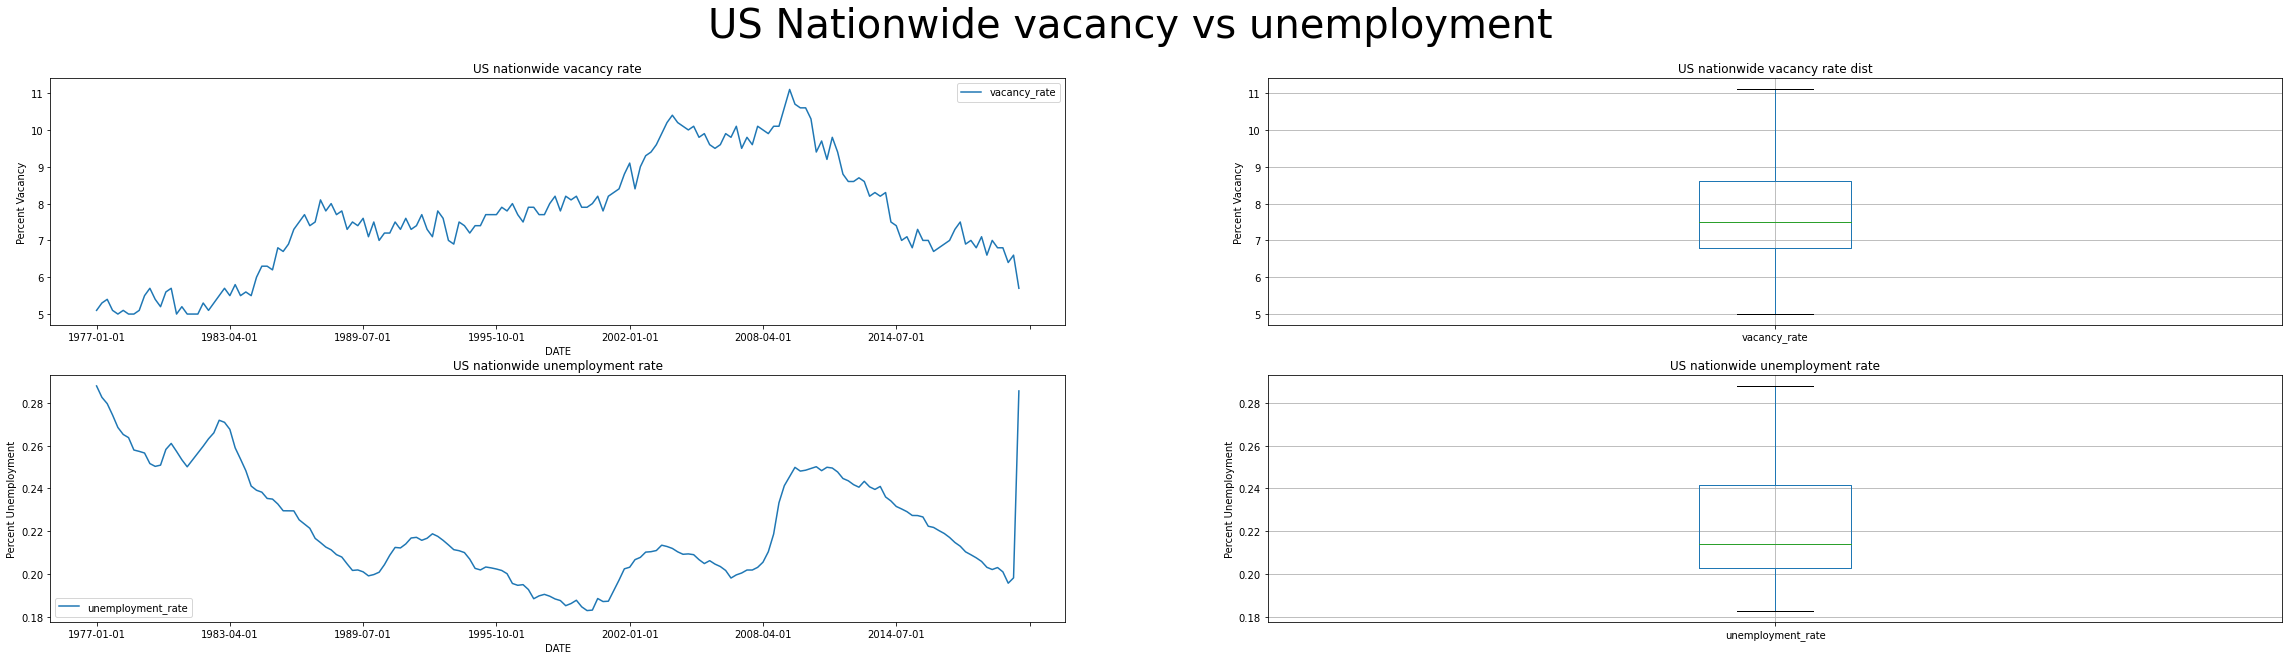

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2 )
fig.suptitle('US Nationwide vacancy vs unemployment', fontsize=40)

ax1 = national_vacancy.plot(x='DATE', y='vacancy_rate',  ax=axes[0,0], figsize=(40,10))
ax1.set_title('US nationwide vacancy rate')
ax2 = national_vacancy.boxplot(column=['vacancy_rate'],  ax=axes[0,1], figsize=(10,10))
ax2.set_title('US nationwide vacancy rate dist')
for ax in [ax1, ax2]:
  ax.set_ylabel('Percent Vacancy')


ax3 = national_vacancy.plot(x='DATE', y='unemployment_rate',  ax=axes[1,0], figsize=(40,10))
ax3.set_title('US nationwide unemployment rate')
ax4 = national_vacancy.boxplot(column=['unemployment_rate'],  ax=axes[1,1], figsize=(10,10))
ax4.set_title('US nationwide unemployment rate')
for ax in [ax3, ax4]:
  ax.set_ylabel('Percent Unemployment')

In [5]:
national_vacancy.quantile(np.array(range(0, 11))/10)

,vacancy_rate
0.0,5.00
0.1,5.37
0.2,5.70
0.3,6.30
0.4,7.00
0.5,7.40
0.6,7.70
0.7,8.10
0.8,8.46
0.9,9.63


Text(0.5, 1.0, 'US Nationwide total Housing Inventory Per Population Dist')

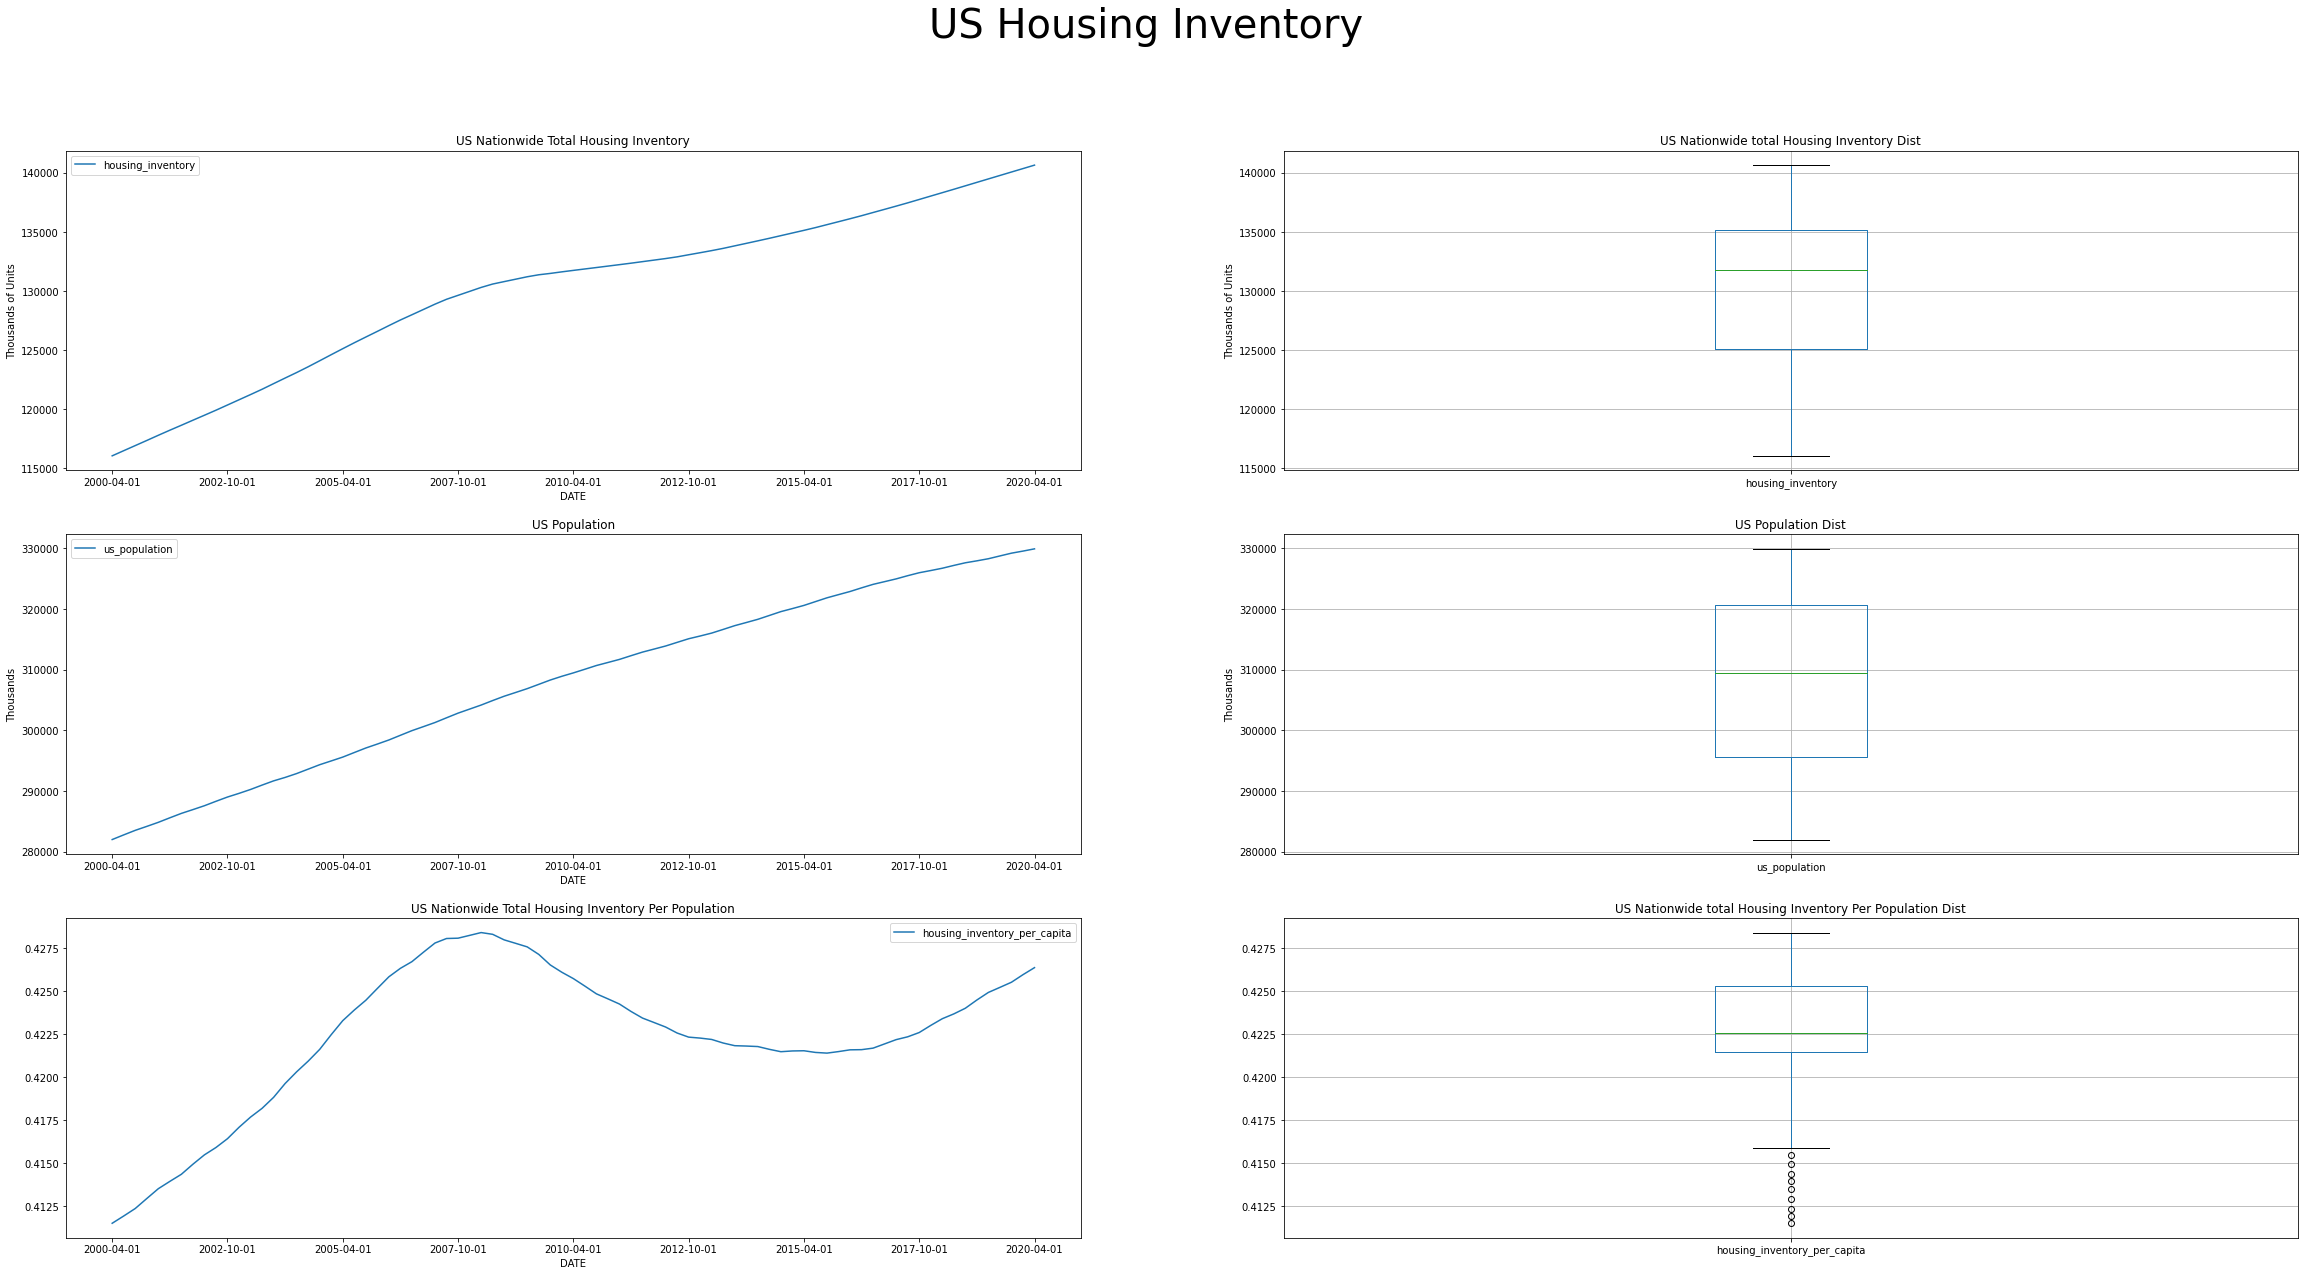

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2 )
fig.suptitle('US Housing Inventory', fontsize=40)

ax1 = housing_inventory.plot(x='DATE', y=['housing_inventory'],  ax=axes[0,0], figsize=(40,20))
ax1.set_title('US Nationwide Total Housing Inventory')
ax2 = housing_inventory.boxplot(column=['housing_inventory'],  ax=axes[0,1], figsize=(10,20))
ax2.set_title('US Nationwide total Housing Inventory Dist')
for ax in [ax1, ax2]:
  ax.set_ylabel('Thousands of Units')

ax3 = housing_inventory.plot(x='DATE', y=['us_population'],  ax=axes[1,0], figsize=(40,20))
ax3.set_title('US Population')
ax4 = housing_inventory.boxplot(column=['us_population'],  ax=axes[1,1], figsize=(10,20))
ax4.set_title('US Population Dist')
for ax in [ax3, ax4]:
  ax.set_ylabel('Thousands')

ax5 = housing_inventory.plot(x='DATE', y=['housing_inventory_per_capita'],  ax=axes[2,0], figsize=(40,20))
ax5.set_title('US Nationwide Total Housing Inventory Per Population')
ax6 = housing_inventory.boxplot(column=['housing_inventory_per_capita'],  ax=axes[2,1], figsize=(10,20))
ax6.set_title('US Nationwide total Housing Inventory Per Population Dist')

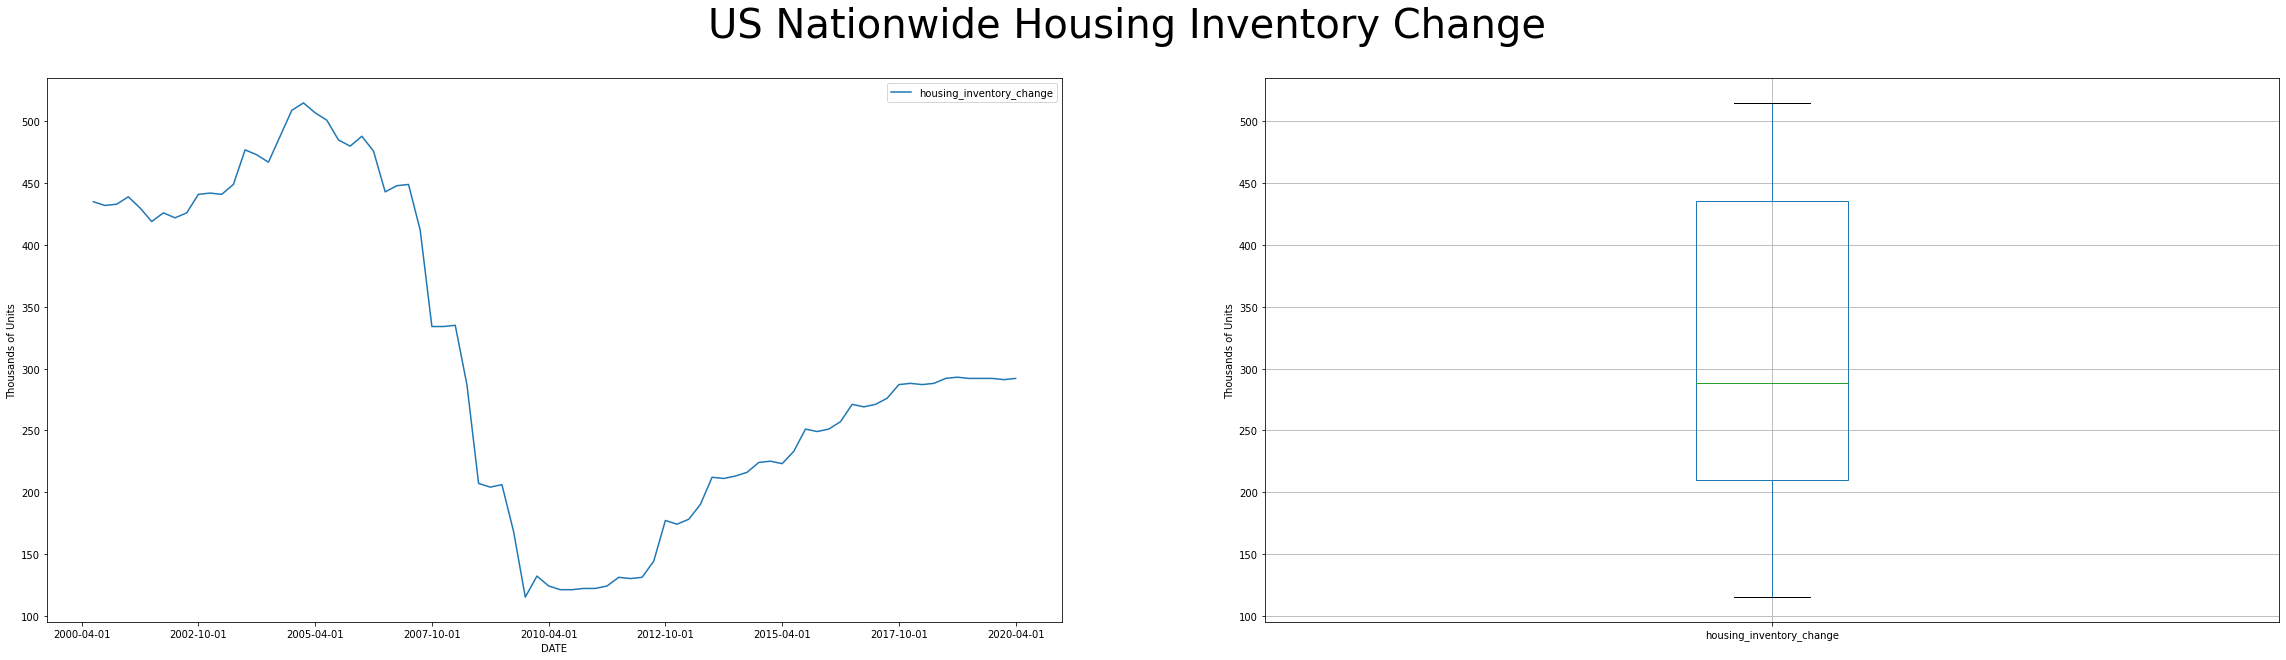

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2 )
fig.suptitle('US Nationwide Housing Inventory Change', fontsize=40)

ax1 = housing_inventory.plot(x='DATE', y='housing_inventory_change',  ax=axes[0], figsize=(40,10))
ax2 = housing_inventory.boxplot(column=['housing_inventory_change'],  ax=axes[1], figsize=(10,10))
for ax in [ax1, ax2]:
  ax.set_ylabel('Thousands of Units')